In [1]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        img = img.resize((224,224))
        img = img.convert('RGB')
        x = np.array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [3]:
image_dir = "fruits/dataset/"

feature_extractor = FeatureExtractor()

# List to store features and image paths
features = []
image_paths = []

# Extract features for each image
for img_path in sorted(Path(image_dir).glob('*')):
    print(img_path)
    img = Image.open(img_path)
    feature = feature_extractor.extract(img)
    features.append(feature)
    image_paths.append(str(img_path))

# Convert lists to numpy arrays
features = np.array(features)
image_paths = np.array(image_paths)

# Save features and image paths to files
np.save("dataset/features.npy", features)
np.save("dataset/image_paths.npy", image_paths)

fruits\dataset\Image_1.jpg
1/1 [==============================] - 3s 3s/step
fruits\dataset\Image_10.jpg
1/1 [==============================] - 1s 735ms/step
fruits\dataset\Image_11.jpg
1/1 [==============================] - 1s 676ms/step
fruits\dataset\Image_12.jpg
1/1 [==============================] - 1s 694ms/step
fruits\dataset\Image_13.png
1/1 [==============================] - 1s 686ms/step
fruits\dataset\Image_14.png
1/1 [==============================] - 1s 732ms/step
fruits\dataset\Image_15.jpg
1/1 [==============================] - 1s 720ms/step
fruits\dataset\Image_16.jpg
1/1 [==============================] - 1s 778ms/step
fruits\dataset\Image_17.jpeg
1/1 [==============================] - 1s 702ms/step
fruits\dataset\Image_18.jpg
1/1 [==============================] - 1s 919ms/step
fruits\dataset\Image_19.jpg
1/1 [==============================] - 1s 937ms/step
fruits\dataset\Image_2.jpg
1/1 [==============================] - 1s 962ms/step
fruits\dataset\Image_20.jpg
1/1 

1/1 [==============================] - 1s 1s/step


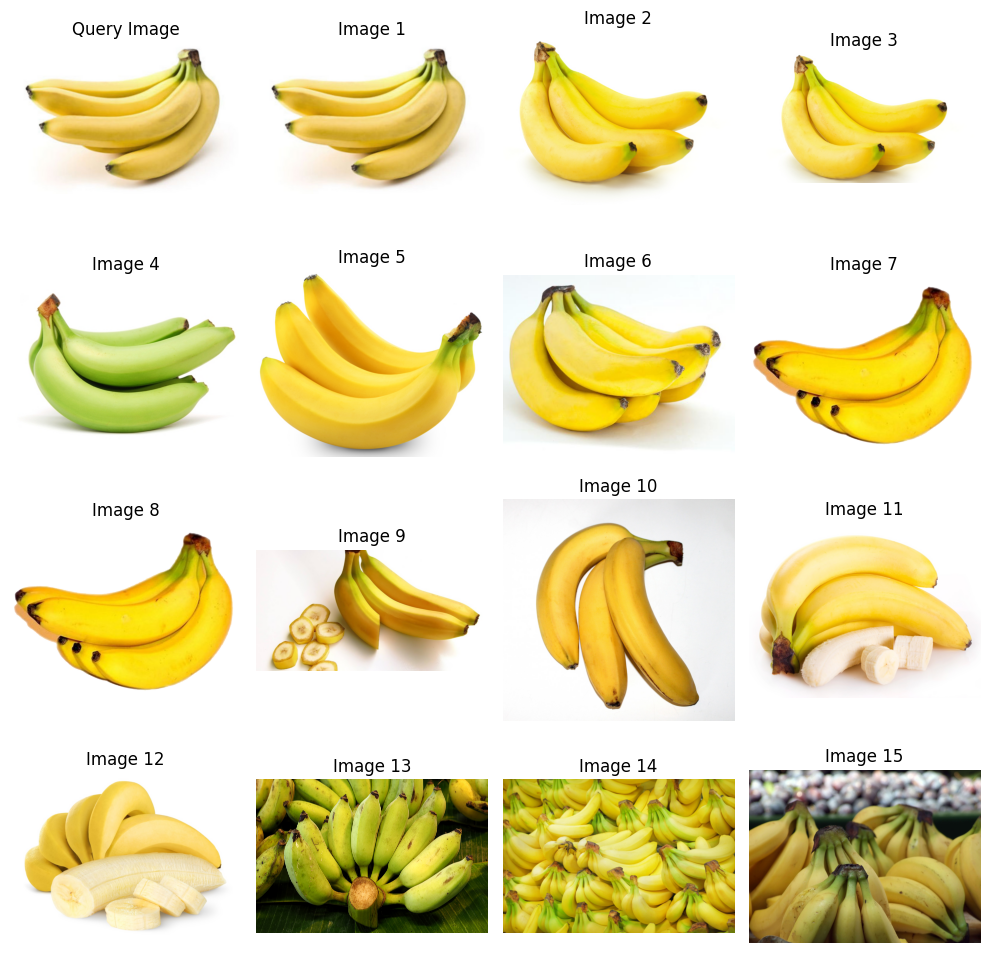

In [4]:
# Load saved features and image paths
features = np.load("dataset/features.npy")
image_paths = np.load("dataset/image_paths.npy")

# Load and extract features for the query image
query_image = Image.open("fruits/Image_26.jpg")
query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Get indices of the 15 most similar images
indices = np.argsort(dists)[:15]
retrieved_images = image_paths[indices]

# Display the query image and retrieved images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot retrieved images
for i, image_path in enumerate(retrieved_images):
    img = Image.open(image_path)
    axes[(i+1)//4, (i+1)%4].imshow(img)
    axes[(i+1)//4, (i+1)%4].set_title(f"Image {i+1}")
    axes[(i+1)//4, (i+1)%4].axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 1s 925ms/step


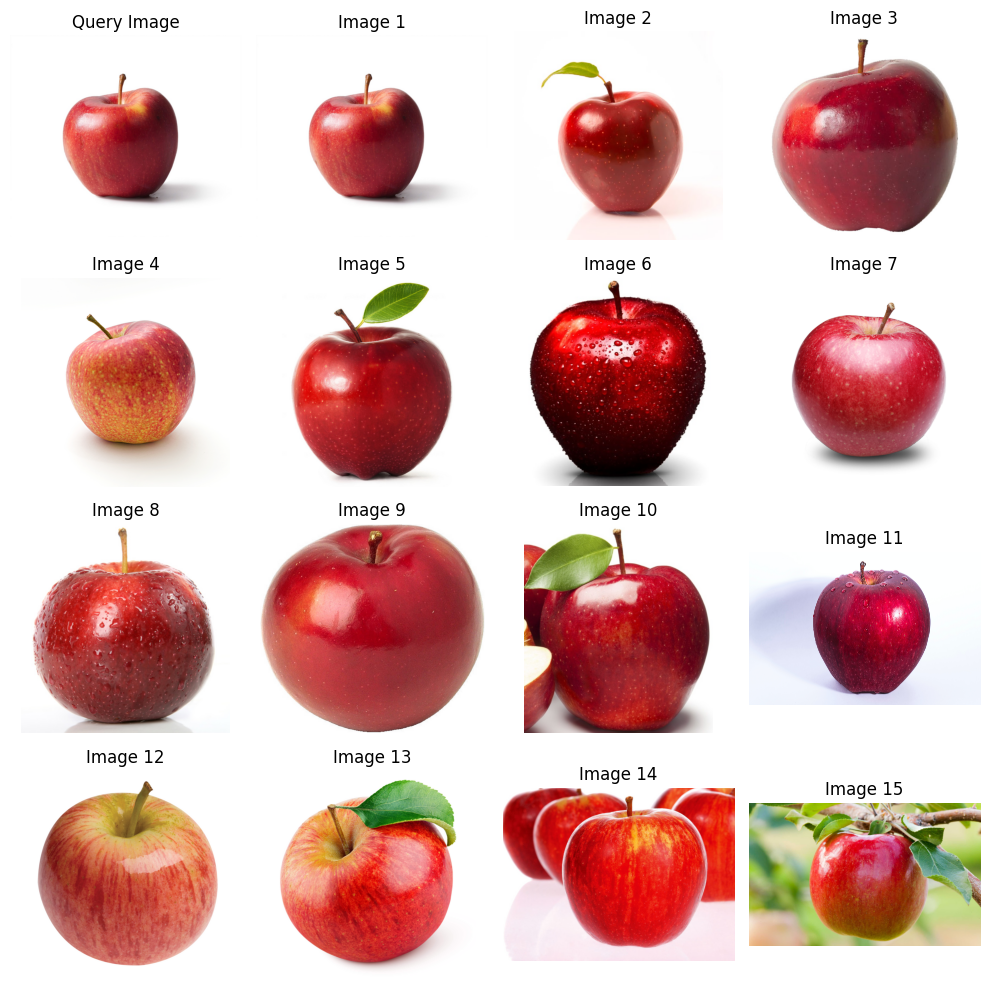

In [5]:
# Load saved features and image paths
features = np.load("dataset/features.npy")
image_paths = np.load("dataset/image_paths.npy")

# Load and extract features for the query image
query_image = Image.open("fruits/Image_10.jpg")
query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Get indices of the 15 most similar images
indices = np.argsort(dists)[:15]
retrieved_images = image_paths[indices]

# Display the query image and retrieved images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot retrieved images
for i, image_path in enumerate(retrieved_images):
    img = Image.open(image_path)
    axes[(i+1)//4, (i+1)%4].imshow(img)
    axes[(i+1)//4, (i+1)%4].set_title(f"Image {i+1}")
    axes[(i+1)//4, (i+1)%4].axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 1s 1s/step


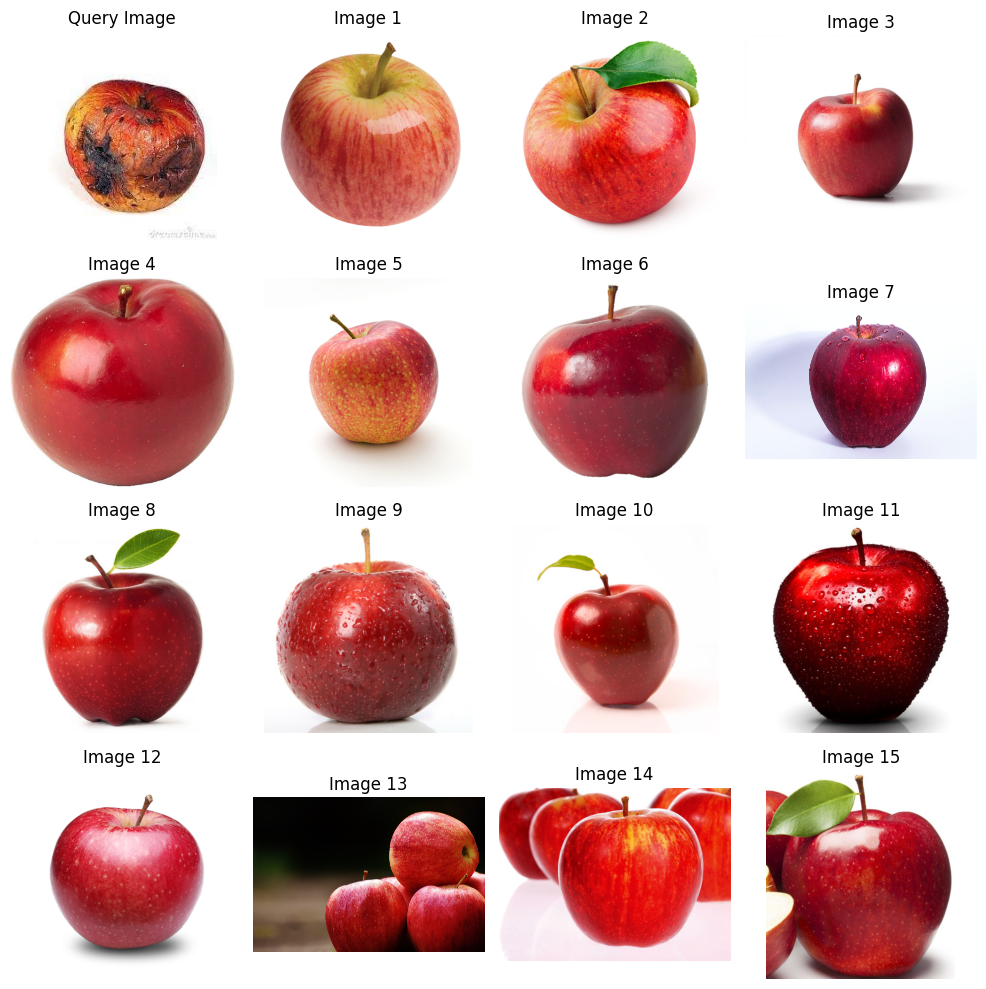

In [6]:
# Load saved features and image paths
features = np.load("dataset/features.npy")
image_paths = np.load("dataset/image_paths.npy")

# Load and extract features for the query image
query_image = Image.open("fruits/TesApel.jpg")
query_feature = FeatureExtractor().extract(query_image)

# Calculate distances between the query feature and all database features
dists = np.linalg.norm(features - query_feature, axis=1)

# Get indices of the 15 most similar images
indices = np.argsort(dists)[:15]
retrieved_images = image_paths[indices]

# Display the query image and retrieved images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Plot query image
axes[0, 0].imshow(query_image)
axes[0, 0].set_title("Query Image")
axes[0, 0].axis('off')

# Plot retrieved images
for i, image_path in enumerate(retrieved_images):
    img = Image.open(image_path)
    axes[(i+1)//4, (i+1)%4].imshow(img)
    axes[(i+1)//4, (i+1)%4].set_title(f"Image {i+1}")
    axes[(i+1)//4, (i+1)%4].axis('off')

plt.tight_layout()
plt.show()